# Abstract

Quantum states are very hard to transport without them dissipating. One way to get around that problem is by teleporting the state. However there may be a range limit on teleportation for some quantum states. We can teleport the state multiple times in a row to increase the transportation distance. Classical analogue is a relay used as a signal repeater in long distance telegraphs. A single relay in this case would be analoguous to a single teleportation.

# Teleportation


We have a state $\left|\phi\right\rangle_C = \alpha \left|0\right\rangle + \beta \left|1\right\rangle$ which we want to teleport over a small distance. By combining it with an entangled $\left|\psi\right\rangle_{AB} = \frac{1}{\sqrt{2}}(\left|00\right\rangle + \left|11\right\rangle)$ the total state becomes $\left|\phi\right\rangle_C \otimes\left|\psi\right\rangle_{AB} = \frac{1}{\sqrt{2}}(\alpha\left|000\right\rangle+\alpha\left|011\right\rangle+\beta\left|100\right\rangle+\beta\left|111\right\rangle)$. Using a controlled not operation on states C and A, with C being the controller and Hadamard operation on C we get $\frac{1}{2}[ \left|00\right\rangle_{CA} (\alpha \left|0\right\rangle_B + \beta \left|1\right\rangle_B)+\left|01\right\rangle_{CA} (\alpha \left|1\right\rangle_B + \beta \left|0\right\rangle_B)+\left|10\right\rangle_{CA} (\alpha \left|0\right\rangle_B - \beta \left|1\right\rangle_B)+\left|11\right\rangle_{CA} (\alpha \left|1\right\rangle_B - \beta \left|0\right\rangle_B)]$. Depending on which of the states ($\left|00\right\rangle_{CA}$,$\left|01\right\rangle_{CA}$,$\left|10\right\rangle_{CA}$,$\left|11\right\rangle_{CA}$) is the result of measurement done on CA tells us what we should do for the state B: if C is 1 we do a Z-rotation on B and if A is 1 we use an X-rotation on B. Then the state B is the same as C was before the teleportation. An important note here is that this operation does not transfer information immediately to another position and violate causality, as the information of the measurement on CA has to be classically transferred to B before we can extract the original state.

![teleport](Teleport2.png "Teleport")

# Relay

Now we can teleport the state B again, before trying to extract the original state. And the twice teleported state can be teleported again and again and so on. We can get the original state by applying Z- and X-gates according to what states have been measured in all the teleportations, from the latest to the first. This way we can transport the state over any distance without it dissipating. 

![relay](Relay3.png "Relay")

# Simulation

The simulation of the relay here is established as a single quantum circuit in qiskit. This gives us a small restriction on the simulation as increasing the size of the circuit takes more and more memory. On the computer I am running the simulation, the maximum size of the simulation is with 12 relay units. One way to increase this would be to use single circuits for each relay unit by creating and then destroying the circuit and saving measurement result. However this is sufficient solution to show that the relay system works, and within this simulation it works for 1 to 12 relays, atleast. The simulation is done with 3 relays as we can show the circuit more clearly at the end. Different relay nodes are separated with barrier lines. Even numbered quantum registers are the ones teleported.

initial C state is: [0.9658715981702938, -0.25902134245649067]
number of relays: 3


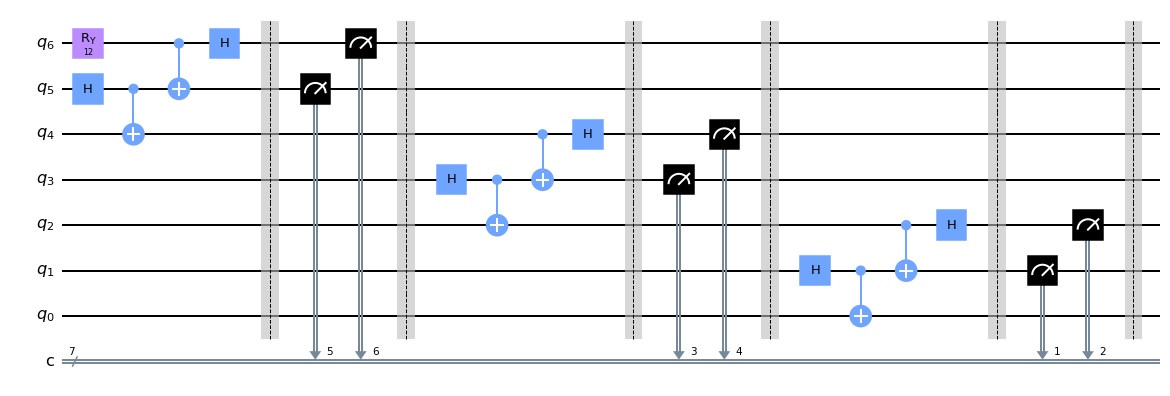

final B state is: [0.9658715981702938, -0.25902134245649067]


In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange
from math import pi, sin, cos

# initialize
relay_n = 3
outcomes = ['00', '01', '10', '11']

# let's use a random state
theta = 2*pi*randrange(10000)/10000

#print("theta =", theta)

print("initial C state is: ["+str(cos(theta))+", "+str(sin(theta))+"]")

print("number of relays: "+str(relay_n))

q = QuantumRegister(2*relay_n + 1,'q')
c = ClassicalRegister(2*relay_n + 1,'c')
qc = QuantumCircuit(q,c)

#prep the state
qc.ry(2*theta, q[2*relay_n])

for i in range(relay_n):
    #print(i)
    
    # prepare the auxiliary qubit and the target qubit
    qc.h(q[2*(relay_n-i) - 1])
    qc.cx(q[2*(relay_n-i) - 1],q[2*(relay_n-i) - 2])

    #teleport to target qubit
    qc.cx(q[2*(relay_n-i)],q[2*(relay_n-i) - 1])
    qc.h(q[2*(relay_n-i)])

    qc.barrier()

    qc.measure(q[2*(relay_n-i) - 1],c[2*(relay_n-i) - 1])
    qc.measure(q[2*(relay_n-i)],c[2*(relay_n-i)])
    
    qc.barrier()

    
# Check the circuit with these
display(qc.draw(output='mpl',reverse_bits = True))
#display(qc.draw(reverse_bits = True))

# Gain access to the state with the information from the measurements
# at the relays from last relay to first
for i in range(relay_n):
    qc.x(q[0]).c_if(c[2*(i+1)-1],1)
    qc.z(q[0]).c_if(c[2*(i+1)],1)

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
cqs=job.result().get_statevector(qc)

#for i in range(len(cqs)):
#    print(cqs[i].real)
for i in range(len(cqs)//2):    
    if cqs[2*i].real != 0 or cqs[2*i+1].real != 0:
        #outcome = outcomes[i]
        b_state = [cqs[2*i].real, cqs[2*i+1].real]

#print("A state is:", outcome)
print("final B state is:", b_state)

# References

\[1\] Michael A. Nielsen & Isaac L. Chuang (2010). Quantum Computation and Quantum Information 10th ed. Cambridge University Press. ISBN 978-1-107-00217-3.